# Aho Corasik

## prefixes de M

In [ ]:
# def prefm(M:list):
#   output = []
#   for word in M:
#     for i in range(1,len(word)):
#       output.append(word[:i])
#   return output


##Table des  préfixes

In [ ]:
from typing import List
def prefm(M:List[str]):
  output = []
  for word in M:
    for i in range(1,len(word)+1):
      if word[:i] not in output:
        output.append(word[:i])
  output.sort(key=lambda x : len(x))
  return output


In [ ]:
thing = prefm(['at','tatt','tt'])
#thing.sort(key=lambda x : len(x))
print(thing)

['a', 't', 'at', 'ta', 'tt', 'tat', 'tatt']


##fonction de suppliance

In [ ]:
from typing import List

def echec (prefixes:List[str]):
  suppliance = {}
  for prefix in prefixes:
    for i in range(1,len(prefix)):
      suffix = prefix[i:]
      if suffix in prefixes:
        suppliance[prefix]=suffix
        break
    if suppliance.get(prefix) is None:
      suppliance[prefix]=''
  # suppliance = 
  return suppliance



In [ ]:
echec(prefm(['at','tatt','tt']))

{'a': '', 'at': 't', 't': '', 'ta': 'a', 'tat': 'at', 'tatt': 'tt', 'tt': 't'}

##Table de sortie

In [ ]:
from typing import List

def sortie(prefixes:List[str], words:List[str]):
  # output dictionary initilization
  output={}
  # for each prefix in the prefixes table (list)
  for prefix in prefixes:
    # we initialize the output of the prefix as empty
    output[prefix] = []
    # foreach suffix of the current prefix
    for i in range(len(prefix)):
      suffix = prefix[i:]
      # if the suffix belongs to the final words, we append it
      if suffix in words:
        output[prefix].append(suffix)
  
  return output


In [ ]:
# course example output
sortie(prefm(['at','tatt','tt']),['at','tatt','tt'])

{'a': [],
 'at': ['at'],
 't': [],
 'ta': [],
 'tat': ['at'],
 'tatt': ['tatt', 'tt'],
 'tt': ['tt']}

##Automate

###Noeud

In [ ]:
from typing import Dict

class Noeud():
  def __init__(self,name = '',nexts = {}, final=False):
    self.name = name
    self.nexts = nexts
    self.final = final

  def next(self, char):
    if self.nexts.get(char) is not None:
      return self.nexts.get(char)
    else:
      return None
  
  def __str__(self):
    return self.name
  
  @property
  def transitions(self):
    return [*self.nexts.keys]

  def addNext(self,char,final=False):
    if self.nexts.get(char) is not None:
      raise Exception("Char path Node already exists")
    else:
      successor = Noeud(self.name+ char, {}, final)
      self.nexts[char] = successor
      return successor
  
  def setNext(self, char:str, next):
    self.nexts[char] = next


###Arbre

In [ ]:

class Arbre():
  def __init__(self, root:Noeud):
    self.root = root
    self.nodes = {'':root}
    self.cursor = root
    self.words = []
  
  def addWord(self, word:str):
    # initalize the cursor to the root node
    self.words.append(word)
    self.cursor = self.root

    for i in range(len(word)):
      letter = word[i]
      final = False
      # si c'est le dernier caractère, le noeud est final
      if i == len(word) - 1:
        final = True
      # si le cursor n'a pas de successeur
      if self.cursor.next(letter) is None:
        self.cursor = self.cursor.addNext(letter, final)
        self.nodes[self.cursor.name] = self.cursor
      else:
        self.cursor =self.cursor.next(letter)

    self.cursor = self.root
    # self.optimizeRoutes()
  
  def setWords(self, words):
    for word in words:
      self.addWord(word)
    
    self.prefixes = prefm(self.words)
    self.supliance = echec(self.prefixes)
    self.tableSortie = sortie(self.prefixes, self.words)
    self.optimizeRoutes()
  

  def __str__(self):
    return str(self.root)
  
  def search(self,text:str):
    self.cursor = self.root
    indicies = {}
    i=0
    while i < len(text):
      letter = text[i]
      if self.cursor.next(letter) is None:
        # cas non trouvé
        if self.cursor.next('') is not None:
          # si une transition vide existe, on transitionnne
          self.cursor = self.cursor.next('')
        else:
          # dans le cas contraire on avance dans le texte
          # on sait qu'on revient à root
          i+=1
      else:
        # cas trouvé
        self.cursor = self.cursor.next(letter)
        i+=1
      
      if self.cursor.final:
        foundWords = self.tableSortie[self.cursor.name]
        for foundWord in foundWords:
          index = i - len(foundWord) + 1
          if indicies.get(foundWord) is None:
            indicies[foundWord] = [index]
          else:
            if index not in indicies[foundWord]:
              indicies[foundWord].append(index)

    return indicies



  def optimizeRoutes(self):
    prefixes = self.prefixes
    supliance = self.supliance
    # self.tableSortie = self.tableSortie

    for prefix in supliance:
      try:
        self.nodes[prefix].setNext(
            '',
            self.nodes[supliance[prefix]]
            )
      except:
        print(self.nodes)
        print(prefix)
        import sys
        sys.exit("Error message")
    
    for item in self.tableSortie:
      if self.tableSortie[item] != []:
        try:
          self.nodes[item].final = True
        except:
          print(str(self.tableSortie))


  def print(self):
    import networkx as nx
    DG = nx.DiGraph()
    for node in self.nodes:
      DG.add_node(node)
    
    for node in self.nodes:
      for edge in self.nodes[node].nexts:
        end = self.nodes[node].nexts[edge]
        DG.add_edge(node,end.name)
    
    nx.draw(DG, with_labels=True)


  def readChar(self, char:str):
    return self.cursor.next(char)
  


In [ ]:
def draw_graph(tree:Arbre):
  import networkx as nx
  import matplotlib.pyplot as plt
  # import pydot
  # from networkx.drawing.nx_pydot import graphviz_layout
  G = nx.DiGraph()

  plt.figure(figsize=(10, 5))


  end = 'red'
  root = 'green'
  normal = 'blue'

  labels = {}

  nodeList = []
  color_map = []

  # fill nodeList and color_map
  for prefix in tree.nodes:
    node = tree.nodes[prefix]
    nodeList.append(prefix)
    if prefix == '':
      color_map.append(root)
    else:
      if node.final:
        color_map.append(end)
      else:
        color_map.append(normal)
  
  G.add_nodes_from(nodeList)

  # specify edges
  for prefix in tree.nodes:
    node = tree.nodes[prefix]
    for transition in node.nexts:
      if transition == '':
        G.add_edge(node.name, node.next('').name, color='red')
      else:
        G.add_edge(node.name, node.next(transition).name, color='black')
        labels[(node.name, node.next(transition).name)]= transition
  
  #  getting the color for edges and puting them into  a list
  colors = nx.get_edge_attributes(G, 'color').values()

  # tebe3t yacine
  pos = nx.kamada_kawai_layout(G)

  nx.draw_networkx_edge_labels(
        G, pos, edge_labels=labels, font_size=15)

  nx.draw_networkx(G, pos, edge_color=colors,
                     connectionstyle="arc3,rad=0.2")  

  # to change noud color
  print("color_map length" + str(len(color_map)))
  print("tree.nodes length" + str(len(tree.nodes)))
  print(G.nodes)
  nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=500)
  # just to chnage noud lables color
  nx.draw_networkx_labels(G, pos, font_color='#000')
  plt.show()
    

###Test


####Exemple du Cours

color_map length8
tree.nodes length8
['', 'a', 'at', 't', 'tt', 'ta', 'tat', 'tatt']


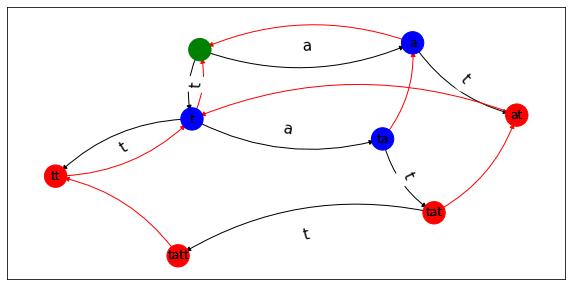

In [ ]:

arbre = Arbre(Noeud('',{}))
arbre.setWords(['at','tt','tatt'])
# arbre.addWord('at')
# arbre.addWord('tt')
# arbre.addWord('tatt')
draw_graph(arbre)
# arbre.search('tatattaatt')

In [ ]:

arbre = Arbre(Noeud('',{}))
# arbre.addWord('aac')
# arbre.addWord('agt')
# arbre.addWord('gta')
arbre.setWords(['aac','agt','gta'])

arbre.search('cagtaaccgta')

{'aac': [5], 'agt': [2], 'gta': [3, 9]}

#Knuth Moris Pratt

##Borders

In [ ]:
def knuthBorders(pattern:str):
  # initializations
  m = len(pattern) # initialize the length
  output = [0 for x in range(m+1)] # initialize the output list
  output[0] = -1
  i = -1
  # for each character in the pattern
  for j in range(m):
    while i >=0 and pattern[i] != pattern[j]:
      i = output[i]
    i+=1
    if j == m-1:
      output[j+1] = i
    else:
      if pattern[j + 1] != pattern[i]:
        output[j+1] = i
      else:
        output[j+1] = output[i]
  return output

knuthBorders("aaacataaa")

[-1, -1, -1, 2, -1, 1, -1, -1, -1, 3]

##kmp

In [ ]:
def Kmp(needle:str, haystack:str, time=False, firstOccurence=False):
  # Initialisations
  output = [] # initializing the output list
  borders = knuthBorders(needle) # compute the borders List
  startTime= 0 # initialize the time counter
  c=0 # initialize the comparison counter
  i,j =0,0
  m,n = len(needle),len(haystack) # length of pattern and text
  
  # if the timer is specified, we start counting
  if time:
    import time
    startTime = time.perf_counter_ns()

  while(i < n-m+1): # for each window in text
    while j < m and haystack[i+j] == needle[j]:
      c+=1 # counting when there's a match from the while statement
      j=j+1 # we compare the next character when ther's a match
    
    # if there's a whole match
    if j == m:
      # if firstOccurence is mentioned we return it
      if firstOccurence:
        if time:
          # if time is specified we return the time
          endTime = time.perf_counter_ns()
          return {'index': i,'time': endTime-startTime,'comparisons': c}
        else:
          # else, we return the indicies only
          return {'index': i,'comparisons': c}
      # else, we append the result to the output list
      else:
        output.append(i)
    else:
      #  counting when there's no match 
      if haystack[i+j] != needle[j]:
        c+=1
    
    # shifting by the border values
    i = i + j - borders[j]
    if borders[j] > 0:
      j = borders[j]
    else:
      j = 0
  # if time is specified we return the time
  if time:
    endTime = time.perf_counter_ns()
    return {'index': i,'time': endTime-startTime,'comparisons': c}
  return {'indicies': output,'comparisons': c}

In [ ]:
# dataset['time_kmp'] = result.apply(lambda row: Kmp(row['needles'], row['haystacks'], time=True, firstOccurence=True)['time'], axis=1)

#Analysis

In [ ]:
# imoprting dependencies
import pandas as pd
print(pd.__version__)

1.1.5


In [ ]:
# defining the Data Shape
needle_lengths = [10, 20, 80, 120, 150]
haystack_lengths = [500, 2000, 8000 , 16000, 32000, 64000, 100000, 400000, 500000, 900000, 1200000, 2400000]
importData=False

##Importing the data

In [ ]:
if importData:
  !git clone https://github.com/Quickinline/dna_sequences_data
  %cd ./dna_sequences_data
  # !git checkout 4e3d25d1621f4fbe2cbc2eea8ded0b1933544811
  dataset = pd.read_csv('data.csv')

In [ ]:
dataset.drop(dataset.columns[0], axis=1, inplace=True)

##Generate the Data

In [ ]:
# Function for generating random dna Sequences
from random import randint
def generate_dna(length: int):
        ADN = ''
        for i in range(0,length):
            ADN+='ACGT'[randint(0,3)]
        return ADN

def generate_from(text:str, length:int):
  start = randint(0,len(text) - length)
  return text[start:start+length]

In [ ]:
# Generating the Haystacks
# generating 20 haystacks (the text) of lengths [ 500, 2000, 8000 , 16000, 32000, 64000, 100000, 400000, 500000, 900000, 1200000]
if not importData:
  haystacks = pd.Series([generate_dna(y) for y in haystack_lengths])


SyntaxError: ignored

In [ ]:
if not importData:
  dataset = pd.DataFrame({'haystacks':haystacks})
  dataset['haystack_length'] = dataset.apply(lambda row: len(row['haystacks']) ,axis=1)
  for length in needle_lengths:
    dataset[f'needle_{length}'] = dataset.apply(lambda row: generate_from(row['haystacks'], length), axis=1)


In [ ]:
dataset

##Testing Aho-Corasick

In [ ]:
from typing import List
def aho_corasick(haystack:str, needles:List[str]):
  tree = Arbre(Noeud('',{}))

  tree.setWords(needles)
  
  import time
  startTime = time.perf_counter_ns()
  result = tree.search(haystack)
  endTime = time.perf_counter_ns()

  return endTime - startTime

In [ ]:
def test_aho(row):
  
  needles = [row[f'needle_{x}'] for x in needle_lengths]
  # if pd.isna(row['time_aho_corasick']):
  return aho_corasick(row['haystacks'],needles)
  # else:
  #   return row['time_aho_corasick']

dataset['time_aho_corasick'] = dataset.apply(test_aho, axis=1)


In [ ]:
dataset

,Unnamed: 0,haystacks,haystack_length,needle_10,needle_20,needle_80,needle_120,needle_150,time_aho_corasick,time_kmp
0,0,CGAAAATCTGGTGTGCCGCAGTGAATAAAACTAGACGTATCATCCT...,500,TGCACGAAGG,AGCTTACAGTTATAGACCCA,GCCCCATCACCAGCTTACAGTTATAGACCCAATTTTAGCGCTCACC...,GTGTGCCGCAGTGAATAAAACTAGACGTATCATCCTCCTGACCACC...,ACTGAACCGATTCATGTGTGGTTCTGGGGCGCAGCATGATGGACGT...,739579,938982
1,1,CTCATAGATTCTTTTGCCCCTAATAACACTCTCTACCCCTCCCCGC...,2000,TCGCAGCCCC,GGTTGACGTTCCACGTGGTG,CCACGAATCATTTTGGGCGTACTACTCTGTAGAATTGAACCAATTA...,GGGAATGCACCTACTGGAGCCCGTGCGCGAAGCGCGTAACAAATCT...,CCCATGGGGTGCTATCCTATACATTGAAAGGTCGCAGCCCCAACAA...,4577835,8674728
2,2,TACATCTACCTGACACTTCTTCATAACATTTCAACTGACGACTTGA...,8000,TTAATGTATA,GCTATGACCACAGAGATTGC,CAACTTCGCCACCTTGCCACCGCCCTGACACAGGCTCTCAGGCGCG...,GTTCTCAGGCAGCACAGGATTATACTCCCAGACGTCATTCATGCTC...,CAGATAATAGTATGTGCTAAATCATACTTAAGCCTCTACAGTTTAC...,20902019,21535379
3,3,GACGAGCCGCTTGCGGGGTGCAAGATAGCCGGATCGAATGGTGTTC...,16000,TTAAATGGGA,ATCACTAGCTGTTAGTTCAT,TATCGACAGGGCCACACGTGTACAGTCTTCCCACGCGAAGTAATTG...,TGTTTTGTGCTCCATGTCCCGTGAGTTAATAGTTCTTAAGAGGGCA...,TGTTAGGGTTGTCAAACAACAGACAGTGTCACACCGAAAAAGTGTC...,26144865,39006094
4,4,CAAACTCAGTTGAACATGCGCGGCATTAAGTTGGTGATTAATTGAG...,32000,TAGGCTTGAA,AGGTCACCAGACGCCGCTGA,CGGACGAAGGTTGTCAGGATAATCCAGAGGTCAAGGTCCAGTAAAT...,GGTAATCACCGGCAGGATAACTATCTTGACTGATAGGTACGTAAAA...,TCAAGCGATCGATAGTGAGCATGTTAGTGTGTAAAGCATCCCCTCA...,72035355,79057790
5,5,TCAAGTTAGCCAACCGTGCTTTATGACACCCCCCCCTACAATACCG...,64000,CCCAACTCAC,AATATCTGTATATTTATAAC,CTCCCTCACCGAAGCTGGGGTGCGTACACGTGGAACAAGACCGAAT...,ACGAGTACTAAATGACCGAACTGGAGGACAGCGAATATAATCCGCC...,CATAGAGTTGTTAAGTAGCTCTTGTAGAATCTTGGCAATTTAGTGG...,96082338,159619268
6,6,AACTGGTCGTGTAAATGGACGTGAGCCACAAACTAGCGGCGGAACG...,100000,AGAGGGCGAT,TACGCGCTGTAGCCATGCGC,TTGGAGGTTATTAGGCTTGCCTCTCTGGAAAGTGGGCAGTTTGTCC...,TTTATCCAGCGTTATCCGAAACCTCCTATACGCAGTAGACATTATT...,GTGCTAAAGCTGCTTGGTCTACACCACTCATCACAGCCGTGAAAGT...,177294658,256015713
7,7,CCGCATCCATGAACCAACTACCGCAAATCTTCGCAACAAGCGTAAG...,400000,GACGGGCCCA,CCCGAGAAACATCTGCATCT,TCGTTTTTTCTACGAGACCCAAAACGGCGGGCTCGAGAGCGCCATT...,TCAGGGTATTTTACCCTGCTTAGACGAACGCATCGTCGAGCTGTGC...,TCGCGAGCGTGCACGTAGCGTCGACGTTTCCGCCGCGACGACTCTT...,739291304,1019429226
8,8,GCGGGAGCATCGTGAGGCATCGATGAGCTATTCGTAAACGGTCTAT...,500000,TATTGAGAAC,CTTTTTTGATCCCGTGCTGC,TTGCTCACGAGCGAAAGTCTTTTTTCGACGAATACTCGATCAGTAG...,TCCGGTACTTTATGACGTGGCTAAAGATCCGACTTGGTAGATCAAA...,GTAGGGCGATGGTGTTTCCGCCCTCCGCTATGACCAGCCATTCGGC...,928631112,1256665040
9,9,AGGGTGTTCCACTCACGACTTCGATGCTACATAAGCTGGCCGTAGG...,900000,CAGAGGACAG,TTAAAGATGACAAGATCCGT,ATGGACCTCACCCGGTGTGCATGAATGCCTATTCTCGTATTGGTAC...,CATATGCTCCCCTGACTCCATACGAGACGCGTGTTTCCGCGCGGTA...,ATGATGAACCGACAGCCGGACAGAATTCCTTACAGATTCGTAGTAG...,1656387408,2295546460


##Testing KMP

In [ ]:
from typing import List
def test_kmp(row):

  # if not pd.isna(row['time_kmp']):
  #   return row['time_kmp']

  haystack = row['haystacks']
  needles = [row[f'needle_{x}'] for x in needle_lengths]
  # import time
  # startTime = time.perf_counter_ns()
  times = []
  for needle in needles:
    times.append(Kmp(needle, haystack, time=True)["time"])
  # endTime = time.perf_counter_ns()

  return sum(times)

In [ ]:
dataset['time_kmp'] = dataset.apply(test_kmp, axis=1)

#Data Visualization

In [ ]:
dataset

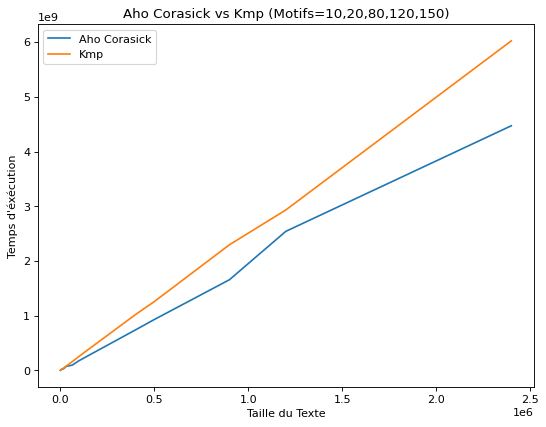

In [ ]:
# Plotting the Execution Time of the four algorithms

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot(dataset['haystack_length'],dataset['time_aho_corasick'],label='Aho Corasick')
plt.plot(dataset['haystack_length'],dataset['time_kmp'],label='Kmp')

motifs = ','.join([str(n) for n in needle_lengths])

plt.title(f'Aho Corasick vs Kmp (Motifs={motifs})')
# Set the y axis label of the current axis.
plt.xlabel('Taille du Texte')
plt.ylabel('Temps d\'éxécution')
# show a legend on the plot
plt.legend()

fig1 = plt.gcf()
# Display a figure.
plt.show()
fig1.savefig(f'Graph.png')

In [ ]:
from google.colab import files
files.download('Graph.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Export Data

In [ ]:
dataset.to_csv('data.csv')
from google.colab import files
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>